In [4]:
#import packages
import pandas as pd
import numpy as np

In [5]:
#to plot within notebook
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
#setting figure size
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20,10

In [7]:
#for normalizing data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

In [8]:
#read the file
df = pd.read_csv('Liveins.csv')

In [9]:
df.head()

,Area_Service,Hospital County,Certificate_num,Hospital Id,Hospital Name,Age,zip_code_3_digits,Gender,Cultural_group,ethnicity,...,Payment_typology_1,payment_typology_2,payment_typology_3,Weight_baby,Abortion,Emergency dept_yes/No,Tot_charg,Tot_cost,ratio_of_total_costs_to_total_charges,Result
0,Western NY,Allegany,226700.0,37.0,Cuba Memorial Hospital Inc,30 to 49,147,F,White,Not Span/Hispanic,...,Blue Cross/Blue Shield,NaN,NaN,0,N,Y,5511.95,5582.49,1.012798,Genuine
1,Western NY,Allegany,226700.0,37.0,Cuba Memorial Hospital Inc,70 or Older,147,F,White,Not Span/Hispanic,...,Medicare,NaN,NaN,0,N,Y,4783.20,5162.82,1.079365,Genuine
2,Western NY,Allegany,226700.0,37.0,Cuba Memorial Hospital Inc,30 to 49,147,F,White,Not Span/Hispanic,...,Blue Cross/Blue Shield,NaN,NaN,0,N,Y,3829.15,4056.52,1.059379,Genuine
3,Western NY,Allegany,226700.0,37.0,Cuba Memorial Hospital Inc,0 to 17,147,F,White,Not Span/Hispanic,...,Private Health Insurance,NaN,NaN,0,N,Y,1108.20,1644.75,1.484167,Fraudulent
4,Western NY,Allegany,226700.0,37.0,Cuba Memorial Hospital Inc,70 or Older,147,F,White,Not Span/Hispanic,...,Medicare,NaN,NaN,0,N,Y,3418.18,3370.87,0.986161,Genuine


In [10]:
#total number of rows and columns in the data set
df.shape

(1048575, 34)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 34 columns):
 #   Column                                 Non-Null Count    Dtype  
---  ------                                 --------------    -----  
 0   Area_Service                           1046119 non-null  object 
 1   Hospital County                        1046119 non-null  object 
 2   Certificate_num                        1046119 non-null  float64
 3   Hospital Id                            1046119 non-null  float64
 4   Hospital Name                          1048575 non-null  object 
 5   Age                                    1048575 non-null  object 
 6   zip_code_3_digits                      1033841 non-null  object 
 7   Gender                                 1048575 non-null  object 
 8   Cultural_group                         1048575 non-null  object 
 9   ethnicity                              1048575 non-null  object 
 10  Days_spend_hsptl                       104

In [12]:
df.describe()

,Certificate_num,Hospital Id,Days_spend_hsptl,year_discharge,ccs_diagnosis_code,ccs_procedure_code,Code_illness,Weight_baby,Tot_charg,Tot_cost,ratio_of_total_costs_to_total_charges
count,1.046119e+06,1.046119e+06,1.048575e+06,1048575.0,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06
mean,3.274942e+06,6.529400e+02,5.411714e+00,2012.0,1.987936e+02,9.723249e+01,2.051806e+00,2.935512e+02,2.708697e+04,1.046399e+04,4.565822e-01
std,2.047362e+06,6.711577e+02,7.925115e+00,0.0,1.652839e+02,8.732697e+01,9.145785e-01,9.494631e+02,5.487428e+04,2.230366e+04,8.029246e-01
min,1.010000e+05,1.000000e+00,1.000000e+00,2012.0,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.100000e-01,1.000000e-01,3.312909e-02
25%,1.401014e+06,2.130000e+02,2.000000e+00,2012.0,1.080000e+02,0.000000e+00,1.000000e+00,0.000000e+00,7.402500e+03,3.234570e+03,3.135802e-01
50%,3.202003e+06,6.300000e+02,3.000000e+00,2012.0,1.590000e+02,9.000000e+01,2.000000e+00,0.000000e+00,1.458988e+04,5.928480e+03,4.091384e-01
75%,4.601004e+06,9.770000e+02,6.000000e+00,2012.0,2.180000e+02,1.740000e+02,3.000000e+00,0.000000e+00,2.914547e+04,1.134317e+04,5.192548e-01
max,7.002054e+06,9.250000e+03,1.200000e+02,2012.0,6.700000e+02,2.310000e+02,4.000000e+00,9.000000e+03,6.196974e+06,2.562478e+06,1.575596e+02


In [13]:
#renaming hospital county column & hospital name
df = df.rename(columns={"Hospital County": "hospitalcounty"})
df = df.rename(columns={"Hospital Name": "hospitalname"})
df = df.rename(columns={"Home or self care,": "homeselfcare"})
df = df.rename(columns={"Mortality risk": "mortalityrisk"})
df = df.rename(columns={"Emergency dept_yes/No": "emergency"})
df = df.rename(columns={"Hospital Id": "hospitalid"})

In [14]:
# Delete multiple columns from the dataframe
#removed zipcode, ethnicity, ccsdiagdesc, ccsproccode, ccsproddesc, descillness, peymenttypo2, paymenttypo3, abortion
df2 = df.drop(["hospitalcounty","hospitalname","zip_code_3_digits","ethnicity","ccs_diagnosis_description","ccs_procedure_code","ccs_procedure_description","apr_drg_description","apr_mdc_description","Description_illness","payment_typology_2", "payment_typology_3","Abortion"], axis=1)

In [15]:
#df2 has dataset with columns dropped
df2.shape

(1048575, 21)

In [16]:
#sum of missing values in each column
df2.isnull().sum()

Area_Service                             2456
Certificate_num                          2456
hospitalid                               2456
Age                                         0
Gender                                      0
Cultural_group                              0
Days_spend_hsptl                            0
Admission_type                              0
homeselfcare                                0
year_discharge                              0
ccs_diagnosis_code                          0
Code_illness                                0
mortalityrisk                              42
Surg_Description                            0
Payment_typology_1                          0
Weight_baby                                 0
emergency                                   0
Tot_charg                                   0
Tot_cost                                    0
ratio_of_total_costs_to_total_charges       0
Result                                      0
dtype: int64

In [17]:
#remove entire row with any missing value
df3 = df2.dropna()

In [18]:
#df3 has full dataset with null values and columns removed
df3.shape

(1046077, 21)

In [19]:
#df4 was created to convert all qualitative values of df3 columns
df4 = df3

In [20]:
df4.shape

(1046077, 21)

In [21]:
df3.dtypes

Area_Service                              object
Certificate_num                          float64
hospitalid                               float64
Age                                       object
Gender                                    object
Cultural_group                            object
Days_spend_hsptl                           int64
Admission_type                            object
homeselfcare                              object
year_discharge                             int64
ccs_diagnosis_code                         int64
Code_illness                               int64
mortalityrisk                             object
Surg_Description                          object
Payment_typology_1                        object
Weight_baby                                int64
emergency                                 object
Tot_charg                                float64
Tot_cost                                 float64
ratio_of_total_costs_to_total_charges    float64
Result              

In [22]:
#unique value of the attribute and their count
df3.Area_Service.value_counts()

Hudson Valley      261064
Western NY         180458
Central NY         171249
Capital/Adirond    170648
Finger Lakes       156183
New York City       74627
Southern Tier       31848
Name: Area_Service, dtype: int64

In [23]:
#codes assigned to unique values
df4["Area_Service"] = df3["Area_Service"].astype('category')
df4["Area_Service"] = df3["Area_Service"].cat.codes

C:\Users\Parth Shah\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Parth Shah\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [24]:
#unique value of the attribute and their count
df3.Age.value_counts()

70 or Older    305859
50 to 69       281841
30 to 49       197970
0 to 17        144227
18 to 29       116180
Name: Age, dtype: int64

In [25]:
df4["Age"] = df3["Age"].astype('category')
df4["Age"] = df3["Age"].cat.codes

C:\Users\Parth Shah\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\Parth Shah\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [26]:
#unique value of the attribute and their count
df3.Gender.value_counts()

F    591534
M    454516
U        27
Name: Gender, dtype: int64

In [27]:
df4["Gender"] = df3["Gender"].astype('category')
df4["Gender"] = df3["Gender"].cat.codes

C:\Users\Parth Shah\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\Parth Shah\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [28]:
df3.Cultural_group.value_counts()

White                     780716
Black/African American    134496
Other Race                127188
Unknown                     3677
Name: Cultural_group, dtype: int64

In [29]:
df4["Cultural_group"] = df3["Cultural_group"].astype('category')
df4["Cultural_group"] = df3["Cultural_group"].cat.codes

C:\Users\Parth Shah\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\Parth Shah\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [30]:
df3.Days_spend_hsptl.value_counts()

2      235990
3      190094
1      154648
4      113658
5       73621
        ...  
108        20
116        20
110        19
101        15
113         7
Name: Days_spend_hsptl, Length: 120, dtype: int64

In [31]:
df4["Days_spend_hsptl"] = df3['Days_spend_hsptl'].astype('int')


C:\Users\Parth Shah\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [32]:
df3.Admission_type.value_counts()

Emergency        607031
Elective         235212
Urgent           110009
Newborn           90553
Trauma             2256
Not Available      1016
Name: Admission_type, dtype: int64

In [33]:
df4["Admission_type"] = df3["Admission_type"].astype('category')
df4["Admission_type"] = df3["Admission_type"].cat.codes

C:\Users\Parth Shah\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\Parth Shah\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [34]:
df3.homeselfcare.value_counts() 

Home or Self Care                        692655
Home w/ Home Health Services             132032
Skilled Nursing Home                     108933
Expired                                   22792
Short-term Hospital                       21419
Inpatient Rehabilitation Facility         17367
Left Against Medical Advice               16997
Psychiatric Hospital or Unit of Hosp       6700
Hospice - Medical Facility                 4781
Hospice - Home                             4735
Another Type Not Listed                    4546
Facility w/ Custodial/Supportive Care      3481
Court/Law Enforcement                      3262
Medicare Cert Long Term Care Hospital      2128
Cancer Center or Children's Hospital       1881
Hosp Basd Medicare Approved Swing Bed      1874
Federal Health Care Facility                455
Critical Access Hospital                     32
Medicaid Cert Nursing Facility                7
Name: homeselfcare, dtype: int64

In [35]:
df4["homeselfcare"] = df3["homeselfcare"].astype('category')
df4["homeselfcare"] = df3["homeselfcare"].cat.codes

C:\Users\Parth Shah\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\Parth Shah\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [36]:
df3.mortalityrisk.value_counts()

Minor       613064
Moderate    232116
Major       141230
Extreme      59667
Name: mortalityrisk, dtype: int64

In [37]:
df4["mortalityrisk"] = df3["mortalityrisk"].astype('category')
df4["mortalityrisk"] = df3["mortalityrisk"].cat.codes

C:\Users\Parth Shah\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\Parth Shah\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [38]:
df3.Surg_Description.value_counts()

Medical     804331
Surgical    241746
Name: Surg_Description, dtype: int64

In [39]:
df4["Surg_Description"] = df3["Surg_Description"].astype('category')
df4["Surg_Description"] = df3["Surg_Description"].cat.codes

C:\Users\Parth Shah\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\Parth Shah\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [40]:
df3.Payment_typology_1.value_counts()

Medicare                     433627
Medicaid                     247896
Blue Cross/Blue Shield       151122
Private Health Insurance     128776
Self-Pay                      32734
Managed Care, Unspecified     19739
Miscellaneous/Other           18356
Federal/State/Local/VA        10727
Department of Corrections      3056
Unknown                          44
Name: Payment_typology_1, dtype: int64

In [41]:
df4["Payment_typology_1"] = df3["Payment_typology_1"].astype('category')
df4["Payment_typology_1"] = df3["Payment_typology_1"].cat.codes

C:\Users\Parth Shah\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\Parth Shah\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [42]:
df3.emergency.value_counts()

Y    588426
N    457651
Name: emergency, dtype: int64

In [43]:
df4["emergency"] = df3["emergency"].astype('category')
df4["emergency"] = df3["emergency"].cat.codes

C:\Users\Parth Shah\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\Parth Shah\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [44]:
df3.Result.value_counts()

Genuine       784578
Fraudulent    261499
Name: Result, dtype: int64

In [45]:
df4["Result"] = df3["Result"].astype('category')
df4["Result"] = df3["Result"].cat.codes

C:\Users\Parth Shah\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\Parth Shah\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [46]:
df4.dtypes

Area_Service                                int8
Certificate_num                          float64
hospitalid                               float64
Age                                         int8
Gender                                      int8
Cultural_group                              int8
Days_spend_hsptl                           int32
Admission_type                              int8
homeselfcare                                int8
year_discharge                             int64
ccs_diagnosis_code                         int64
Code_illness                               int64
mortalityrisk                               int8
Surg_Description                            int8
Payment_typology_1                          int8
Weight_baby                                int64
emergency                                   int8
Tot_charg                                float64
Tot_cost                                 float64
ratio_of_total_costs_to_total_charges    float64
Result              

In [47]:
df4.shape

(1046077, 21)

In [48]:
df4

,Area_Service,Certificate_num,hospitalid,Age,Gender,Cultural_group,Days_spend_hsptl,Admission_type,homeselfcare,year_discharge,...,Code_illness,mortalityrisk,Surg_Description,Payment_typology_1,Weight_baby,emergency,Tot_charg,Tot_cost,ratio_of_total_costs_to_total_charges,Result
0,6,226700.0,37.0,2,0,3,4,0,7,2012,...,1,2,0,0,0,1,5511.95,5582.49,1.012798,1
1,6,226700.0,37.0,4,0,3,4,5,17,2012,...,3,1,0,5,0,1,4783.20,5162.82,1.079365,1
2,6,226700.0,37.0,2,0,3,3,5,7,2012,...,1,2,0,0,0,1,3829.15,4056.52,1.059379,1
3,6,226700.0,37.0,0,0,3,1,5,7,2012,...,1,2,0,7,0,1,1108.20,1644.75,1.484167,0
4,6,226700.0,37.0,4,0,3,3,0,7,2012,...,2,3,0,5,0,1,3418.18,3370.87,0.986161,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,4,7000006.0,1169.0,4,0,1,6,1,18,2012,...,2,3,0,5,0,1,69650.41,13896.82,0.199522,1
1048571,4,7000006.0,1169.0,0,0,1,2,1,7,2012,...,2,2,0,4,0,0,13587.38,3918.35,0.288382,1
1048572,4,7000006.0,1169.0,3,1,1,13,1,15,2012,...,4,0,0,4,0,1,104629.78,24746.64,0.236516,0
1048573,4,7000006.0,1169.0,2,0,0,2,1,7,2012,...,1,2,1,4,0,1,27521.41,6766.04,0.245846,1


In [49]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1046077 entries, 0 to 1048574
Data columns (total 21 columns):
 #   Column                                 Non-Null Count    Dtype  
---  ------                                 --------------    -----  
 0   Area_Service                           1046077 non-null  int8   
 1   Certificate_num                        1046077 non-null  float64
 2   hospitalid                             1046077 non-null  float64
 3   Age                                    1046077 non-null  int8   
 4   Gender                                 1046077 non-null  int8   
 5   Cultural_group                         1046077 non-null  int8   
 6   Days_spend_hsptl                       1046077 non-null  int32  
 7   Admission_type                         1046077 non-null  int8   
 8   homeselfcare                           1046077 non-null  int8   
 9   year_discharge                         1046077 non-null  int64  
 10  ccs_diagnosis_code                     104

In [50]:
#To reset the index count
df4 = df4.reset_index() 

In [51]:
df5 = df4.drop(["index","year_discharge","Certificate_num","Cultural_group","homeselfcare","Surg_Description","Weight_baby","Tot_charg","Tot_cost","mortalityrisk"], axis=1)
#removed a few more columns to get a better correlation

In [52]:
df5 

,Area_Service,hospitalid,Age,Gender,Days_spend_hsptl,Admission_type,ccs_diagnosis_code,Code_illness,Payment_typology_1,emergency,ratio_of_total_costs_to_total_charges,Result
0,6,37.0,2,0,4,0,122,1,0,1,1.012798,1
1,6,37.0,4,0,4,5,197,3,5,1,1.079365,1
2,6,37.0,2,0,3,5,122,1,0,1,1.059379,1
3,6,37.0,0,0,1,5,122,1,7,1,1.484167,0
4,6,37.0,4,0,3,0,122,2,5,1,0.986161,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1046072,4,1169.0,4,0,6,1,106,2,5,1,0.199522,1
1046073,4,1169.0,0,0,2,1,8,2,4,0,0.288382,1
1046074,4,1169.0,3,1,13,1,151,4,4,1,0.236516,0
1046075,4,1169.0,2,0,2,1,143,1,4,1,0.245846,1


## df5 is Cleaned and columns are converted, now using it for eda
### Exploratory Data Analysis refers to the critical process of performing initial investigations on data so as to discover patterns,to spot anomalies,to test hypothesis and to check assumptions with the help of summary statistics and graphical representations.

In [53]:
#columns and their corresponding data types,along with finding whether they contain null values or not
df5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1046077 entries, 0 to 1046076
Data columns (total 12 columns):
 #   Column                                 Non-Null Count    Dtype  
---  ------                                 --------------    -----  
 0   Area_Service                           1046077 non-null  int8   
 1   hospitalid                             1046077 non-null  float64
 2   Age                                    1046077 non-null  int8   
 3   Gender                                 1046077 non-null  int8   
 4   Days_spend_hsptl                       1046077 non-null  int32  
 5   Admission_type                         1046077 non-null  int8   
 6   ccs_diagnosis_code                     1046077 non-null  int64  
 7   Code_illness                           1046077 non-null  int64  
 8   Payment_typology_1                     1046077 non-null  int8   
 9   emergency                              1046077 non-null  int8   
 10  ratio_of_total_costs_to_total_charges  104

In [54]:
#various summary statistics.This function returns the count, mean, standard deviation, minimum and maximum values 
#and the quantiles of the data
df5.describe()

,Area_Service,hospitalid,Age,Gender,Days_spend_hsptl,Admission_type,ccs_diagnosis_code,Code_illness,Payment_typology_1,emergency,ratio_of_total_costs_to_total_charges,Result
count,1.046077e+06,1.046077e+06,1.046077e+06,1.046077e+06,1.046077e+06,1.046077e+06,1.046077e+06,1.046077e+06,1.046077e+06,1.046077e+06,1.046077e+06,1.046077e+06
mean,2.683649e+00,6.529453e+02,2.467389e+00,4.345474e-01,5.417040e+00,1.290779e+00,1.987849e+02,2.052845e+00,4.318307e+00,5.625073e-01,4.563692e-01,7.500194e-01
std,1.979379e+00,6.711664e+02,1.372254e+00,4.957497e-01,7.926823e+00,1.390243e+00,1.653710e+02,9.146874e-01,2.095397e+00,4.960777e-01,8.009643e-01,4.330017e-01
min,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,3.312909e-02,0.000000e+00
25%,1.000000e+00,2.130000e+02,2.000000e+00,0.000000e+00,2.000000e+00,1.000000e+00,1.080000e+02,1.000000e+00,4.000000e+00,0.000000e+00,3.135364e-01,1.000000e+00
50%,3.000000e+00,6.300000e+02,3.000000e+00,0.000000e+00,3.000000e+00,1.000000e+00,1.590000e+02,2.000000e+00,5.000000e+00,1.000000e+00,4.091162e-01,1.000000e+00
75%,4.000000e+00,9.770000e+02,4.000000e+00,1.000000e+00,6.000000e+00,1.000000e+00,2.180000e+02,3.000000e+00,5.000000e+00,1.000000e+00,5.191341e-01,1.000000e+00
max,6.000000e+00,9.250000e+03,4.000000e+00,2.000000e+00,1.200000e+02,5.000000e+00,6.700000e+02,4.000000e+00,9.000000e+00,1.000000e+00,1.575596e+02,1.000000e+00


In [55]:
df5.Result.value_counts()

1    784578
0    261499
Name: Result, dtype: int64

In [56]:
df.Area_Service.value_counts()

Hudson Valley      261074
Western NY         180459
Central NY         171251
Capital/Adirond    170671
Finger Lakes       156186
New York City       74629
Southern Tier       31849
Name: Area_Service, dtype: int64

In [57]:
#df5 = df5[0:7000]

In [58]:
#correlation matrix
df5.corr(method="pearson")

,Area_Service,hospitalid,Age,Gender,Days_spend_hsptl,Admission_type,ccs_diagnosis_code,Code_illness,Payment_typology_1,emergency,ratio_of_total_costs_to_total_charges,Result
Area_Service,1.000000,0.032892,-0.006143,-0.003268,0.014292,-0.077596,0.003298,0.004416,0.020896,0.041095,0.019284,0.000264
hospitalid,0.032892,1.000000,-0.045089,-0.013499,0.017949,-0.039141,0.052240,-0.048172,0.034495,-0.030569,0.005124,-0.001224
Age,-0.006143,-0.045089,1.000000,0.011102,0.094139,-0.112065,-0.222384,0.417863,0.186064,0.347310,-0.049829,-0.000110
Gender,-0.003268,-0.013499,0.011102,1.000000,0.045514,0.006918,0.063023,0.067160,0.022948,0.077905,-0.023221,-0.000237
Days_spend_hsptl,0.014292,0.017949,0.094139,0.045514,1.000000,0.015137,0.130712,0.326077,0.038818,0.028158,0.001267,-0.001147
Admission_type,-0.077596,-0.039141,-0.112065,0.006918,0.015137,1.000000,0.012770,0.016837,-0.024008,-0.078265,0.022364,-0.000886
ccs_diagnosis_code,0.003298,0.052240,-0.222384,0.063023,0.130712,0.012770,1.000000,-0.181957,0.009559,-0.100728,0.030726,0.000675
Code_illness,0.004416,-0.048172,0.417863,0.067160,0.326077,0.016837,-0.181957,1.000000,0.108025,0.310398,-0.034124,0.000755
Payment_typology_1,0.020896,0.034495,0.186064,0.022948,0.038818,-0.024008,0.009559,0.108025,1.000000,0.114849,-0.013706,0.000737
emergency,0.041095,-0.030569,0.347310,0.077905,0.028158,-0.078265,-0.100728,0.310398,0.114849,1.000000,-0.049392,0.001496


In [59]:
#correlation matrix
df5.corr(method="kendall")

,Area_Service,hospitalid,Age,Gender,Days_spend_hsptl,Admission_type,ccs_diagnosis_code,Code_illness,Payment_typology_1,emergency,ratio_of_total_costs_to_total_charges,Result
Area_Service,1.000000,0.108028,-0.009667,-0.000310,0.006892,-0.052126,-0.001814,-0.001943,0.005554,0.041421,0.038904,0.000229
hospitalid,0.108028,1.000000,-0.017021,0.003162,0.028077,-0.007596,0.025563,-0.023957,0.031966,0.009130,-0.065593,-0.001550
Age,-0.009667,-0.017021,1.000000,0.013057,0.182953,-0.116191,-0.244300,0.367577,0.235808,0.305402,-0.086804,-0.000288
Gender,-0.000310,0.003162,0.013057,1.000000,0.028939,0.063049,0.010304,0.060850,0.022910,0.077944,-0.043532,-0.000244
Days_spend_hsptl,0.006892,0.028077,0.182953,0.028939,1.000000,-0.003089,0.009336,0.356709,0.061021,0.090170,0.045319,-0.000376
Admission_type,-0.052126,-0.007596,-0.116191,0.063049,-0.003089,1.000000,0.024948,0.026883,-0.024791,0.142163,-0.004500,-0.000004
ccs_diagnosis_code,-0.001814,0.025563,-0.244300,0.010304,0.009336,0.024948,1.000000,-0.192938,-0.052330,-0.190831,0.093188,0.000491
Code_illness,-0.001943,-0.023957,0.367577,0.060850,0.356709,0.026883,-0.192938,1.000000,0.118420,0.296120,-0.060680,0.000727
Payment_typology_1,0.005554,0.031966,0.235808,0.022910,0.061021,-0.024791,-0.052330,0.118420,1.000000,0.118449,-0.043537,0.000357
emergency,0.041421,0.009130,0.305402,0.077944,0.090170,0.142163,-0.190831,0.296120,0.118449,1.000000,-0.124687,0.001496


In [60]:
#correlation matrix
df5.corr(method="spearman")

,Area_Service,hospitalid,Age,Gender,Days_spend_hsptl,Admission_type,ccs_diagnosis_code,Code_illness,Payment_typology_1,emergency,ratio_of_total_costs_to_total_charges,Result
Area_Service,1.000000,0.096392,-0.012189,-0.000350,0.009061,-0.062501,-0.002659,-0.002380,0.006984,0.046896,0.057679,0.000260
hospitalid,0.096392,1.000000,-0.023077,0.003844,0.039321,-0.009422,0.037543,-0.031373,0.043575,0.011098,-0.099058,-0.001884
Age,-0.012189,-0.023077,1.000000,0.014481,0.235768,-0.150360,-0.327216,0.432940,0.301341,0.338735,-0.117919,-0.000319
Gender,-0.000350,0.003844,0.014481,1.000000,0.033458,0.066905,0.012510,0.065543,0.025197,0.077945,-0.053306,-0.000244
Days_spend_hsptl,0.009061,0.039321,0.235768,0.033458,1.000000,-0.004726,0.016214,0.433719,0.078205,0.104251,0.064260,-0.000435
Admission_type,-0.062501,-0.009422,-0.150360,0.066905,-0.004726,1.000000,0.043958,0.027818,-0.026784,0.150861,-0.003332,-0.000004
ccs_diagnosis_code,-0.002659,0.037543,-0.327216,0.012510,0.016214,0.043958,1.000000,-0.251959,-0.071096,-0.231615,0.138224,0.000596
Code_illness,-0.002380,-0.031373,0.432940,0.065543,0.433719,0.027818,-0.251959,1.000000,0.139461,0.318957,-0.079996,0.000783
Payment_typology_1,0.006984,0.043575,0.301341,0.025197,0.078205,-0.026784,-0.071096,0.139461,1.000000,0.130270,-0.058903,0.000392
emergency,0.046896,0.011098,0.338735,0.077945,0.104251,0.150861,-0.231615,0.318957,0.130270,1.000000,-0.152680,0.001496


In [61]:
#Covariance matrix
df5.cov()

,Area_Service,hospitalid,Age,Gender,Days_spend_hsptl,Admission_type,ccs_diagnosis_code,Code_illness,Payment_typology_1,emergency,ratio_of_total_costs_to_total_charges,Result
Area_Service,3.917939,43.697140,-0.016687,-0.003206,0.224242,-0.213530,1.079498,0.007996,0.086668,0.040352,0.030573,0.000226
hospitalid,43.697140,450464.297169,-41.527169,-4.491611,95.490896,-36.522019,5798.220256,-29.573107,48.511770,-10.177850,2.754449,-0.355614
Age,-0.016687,-41.527169,1.883082,0.007553,1.024013,-0.213793,-50.465890,0.524495,0.535012,0.236429,-0.054769,-0.000065
Gender,-0.003206,-4.491611,0.007553,0.245768,0.178859,0.004768,5.166755,0.030454,0.023839,0.019159,-0.009221,-0.000051
Days_spend_hsptl,0.224242,95.490896,1.024013,0.178859,62.834520,0.166813,171.346149,2.364243,0.644761,0.110725,0.008043,-0.003937
Admission_type,-0.213530,-36.522019,-0.213793,0.004768,0.166813,1.932774,2.935855,0.021410,-0.069938,-0.053977,0.024903,-0.000533
ccs_diagnosis_code,1.079498,5798.220256,-50.465890,5.166755,171.346149,2.935855,27347.583555,-27.523366,3.312201,-8.263431,4.069859,0.048311
Code_illness,0.007996,-29.573107,0.524495,0.030454,2.364243,0.021410,-27.523366,0.836653,0.207045,0.140845,-0.025000,0.000299
Payment_typology_1,0.086668,48.511770,0.535012,0.023839,0.644761,-0.069938,3.312201,0.207045,4.390689,0.119383,-0.023004,0.000668
emergency,0.040352,-10.177850,0.236429,0.019159,0.110725,-0.053977,-8.263431,0.140845,0.119383,0.246093,-0.019625,0.000321


In [62]:
import seaborn as sns

### df6 used for making heatmaps only. main dataset still in df5

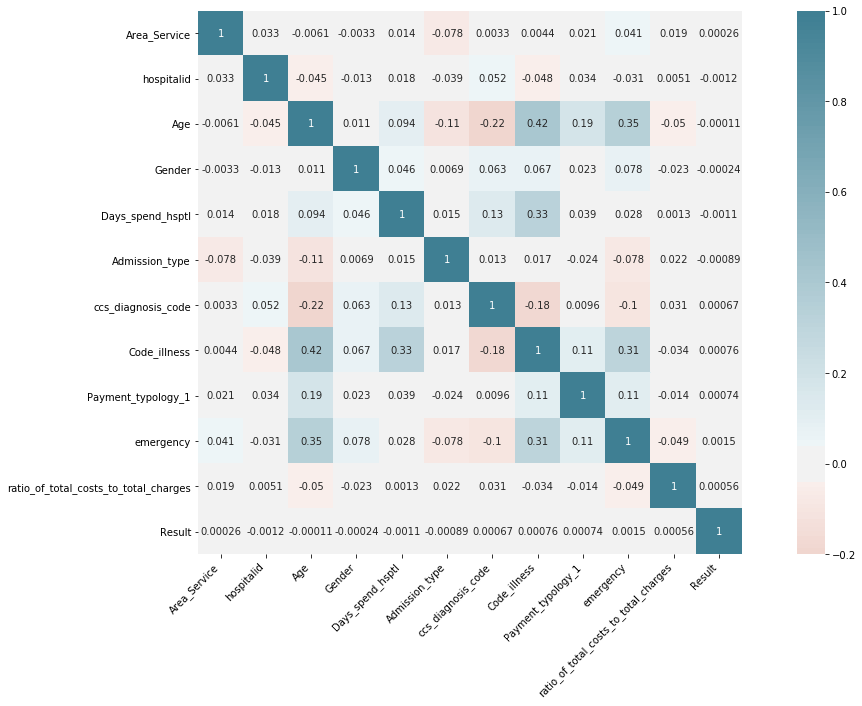

In [63]:
df6=df5
corr=df6.corr(method="pearson")
ax = sns.heatmap(
    corr, 
    vmin=-0.2, vmax=1, center=0, annot=True,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);
#ax=sns.heatmap(df6)

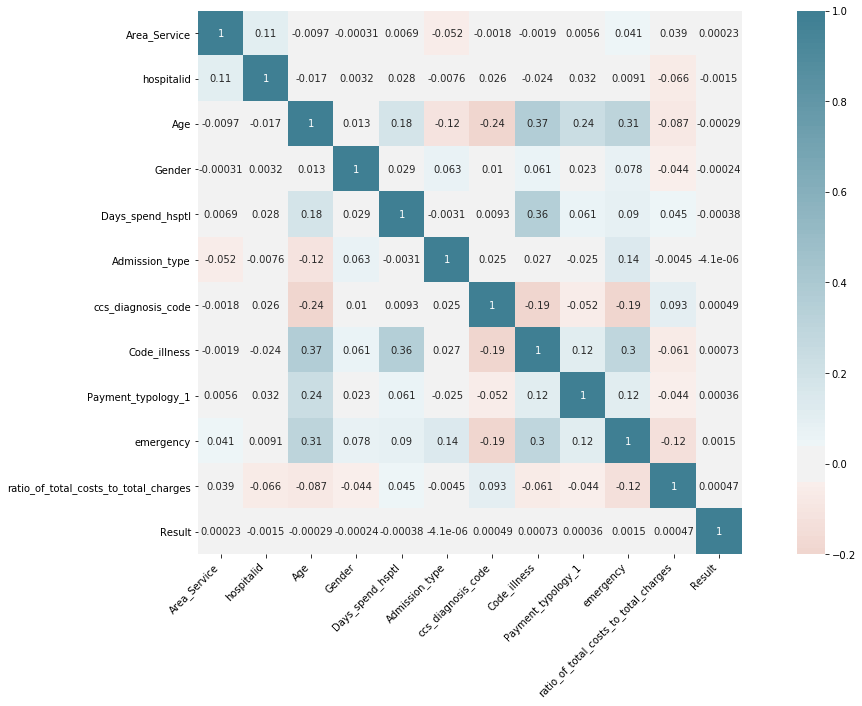

In [64]:
df6=df5
corr=df6.corr(method="kendall")
ax = sns.heatmap(
    corr, 
    vmin=-0.2, vmax=1, center=0, annot=True,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);
#ax=sns.heatmap(df6)

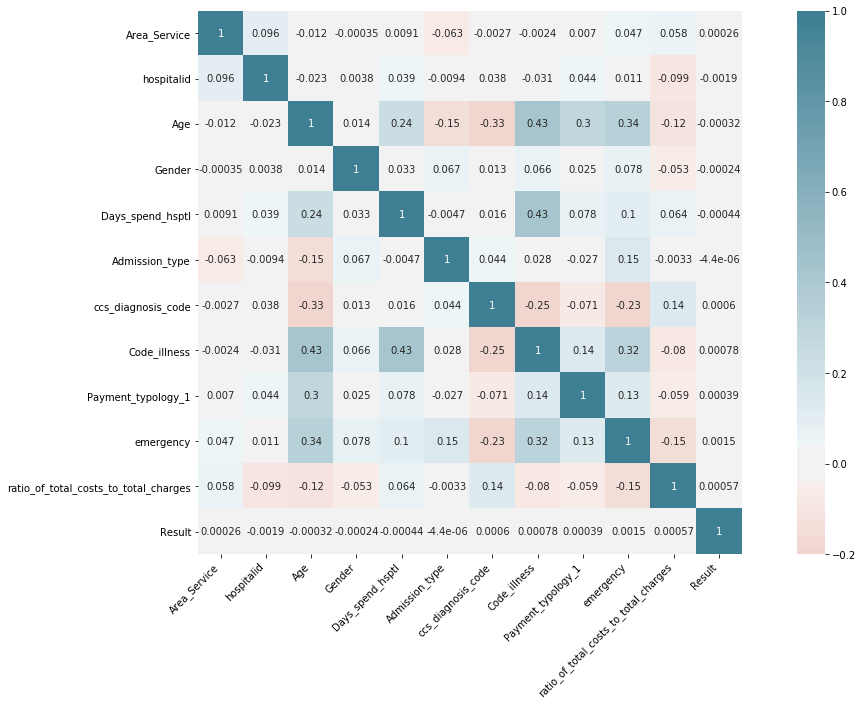

In [65]:
df6=df5
corr=df6.corr(method="spearman")
ax = sns.heatmap(
    corr, 
    vmin=-0.2, vmax=1, center=0, annot=True,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);
#ax=sns.heatmap(df6)

#### 0 - Fraud
#### 1 - Genuine

In [66]:
df5.Result.value_counts().sort_values(ascending=True)

0    261499
1    784578
Name: Result, dtype: int64

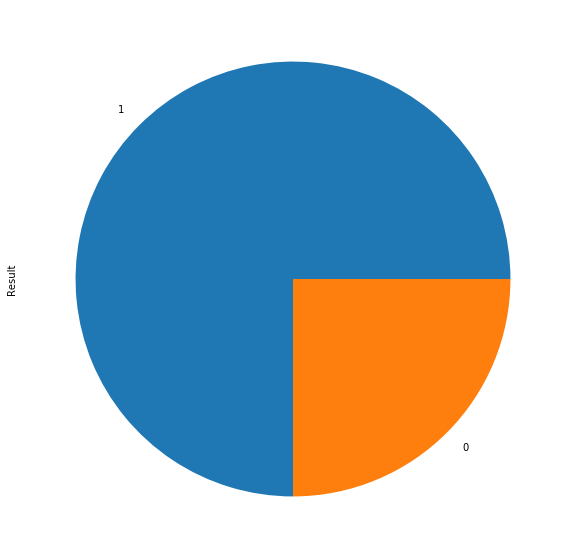

In [67]:
df5['Result'].value_counts().plot(kind='pie')

#### 0 - 0 to 17
#### 1 - 18 to 29
#### 2 - 30 to 49
#### 3 - 50 to 69
#### 4 - 70++

In [68]:
df5.Age.value_counts().sort_values(ascending=True)

1    116180
0    144227
2    197970
3    281841
4    305859
Name: Age, dtype: int64

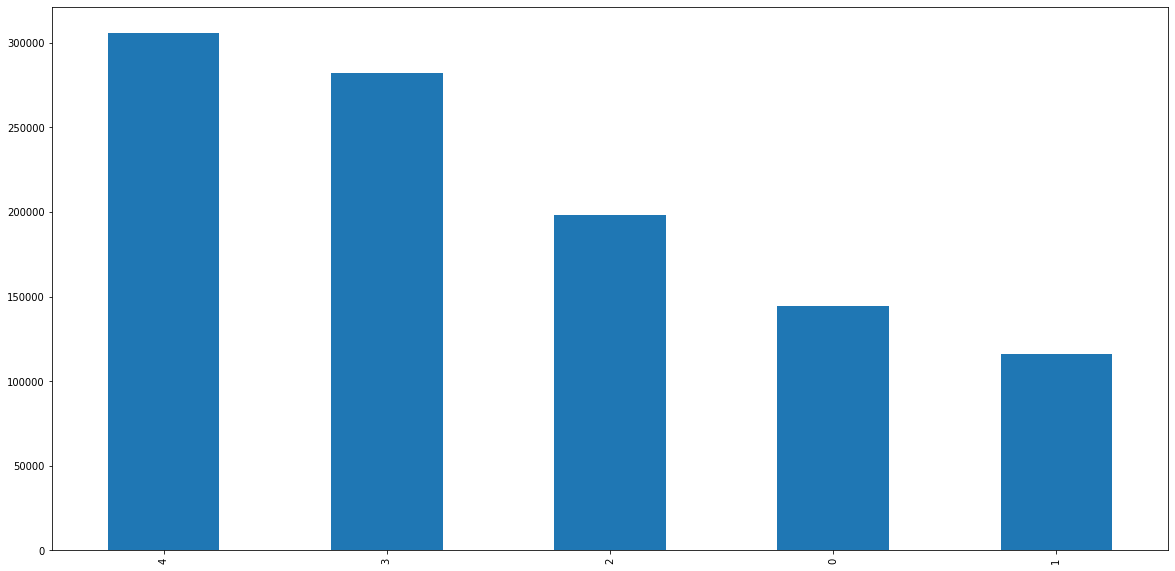

In [69]:
df5['Age'].value_counts().plot(kind='bar')

#### 0 - Female
#### 1 - Male
#### 2 - Undefined

In [70]:
df5.Gender.value_counts().sort_values(ascending=True)

2        27
1    454516
0    591534
Name: Gender, dtype: int64

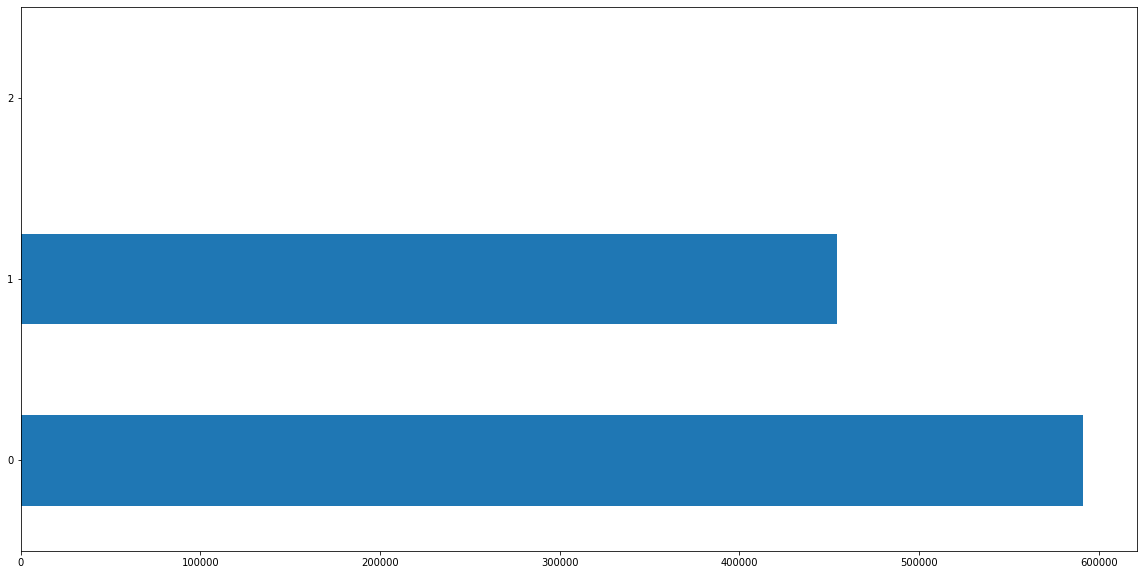

In [71]:
df5['Gender'].value_counts().plot(kind='barh')

#####  Days spend in hospital boxplot

In [72]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1046077 entries, 0 to 1046076
Data columns (total 12 columns):
 #   Column                                 Non-Null Count    Dtype  
---  ------                                 --------------    -----  
 0   Area_Service                           1046077 non-null  int8   
 1   hospitalid                             1046077 non-null  float64
 2   Age                                    1046077 non-null  int8   
 3   Gender                                 1046077 non-null  int8   
 4   Days_spend_hsptl                       1046077 non-null  int32  
 5   Admission_type                         1046077 non-null  int8   
 6   ccs_diagnosis_code                     1046077 non-null  int64  
 7   Code_illness                           1046077 non-null  int64  
 8   Payment_typology_1                     1046077 non-null  int8   
 9   emergency                              1046077 non-null  int8   
 10  ratio_of_total_costs_to_total_charges  104

In [73]:
df5.Days_spend_hsptl.unique()

array([  4,   3,   1,   2,   5,   6,  14,  12,   9,   8,  10,   7,  22,
        11,  16,  15,  25,  13,  17,  28,  18,  19,  23,  38,  20,  24,
        26,  21,  27,  30,  29,  39,  87,  35,  37,  32,  55,  56,  49,
       110,  69,  75,  42,  51,  47,  45,  46,  40,  34,  79,  43, 120,
        65,  41,  31,  50,  59,  44,  36,  70, 115,  58,  94,  33,  68,
        67,  54,  80,  85,  95,  78,  91,  88,  48,  52,  63,  57,  74,
        64,  53,  62,  97,  72, 118,  81,  90,  86, 106, 112, 105, 114,
        66,  89,  83,  84,  82,  93, 116,  71,  60,  73,  61,  92,  76,
        96,  77, 104, 100, 103, 102, 117, 108,  99, 107,  98, 101, 119,
       111, 109, 113])

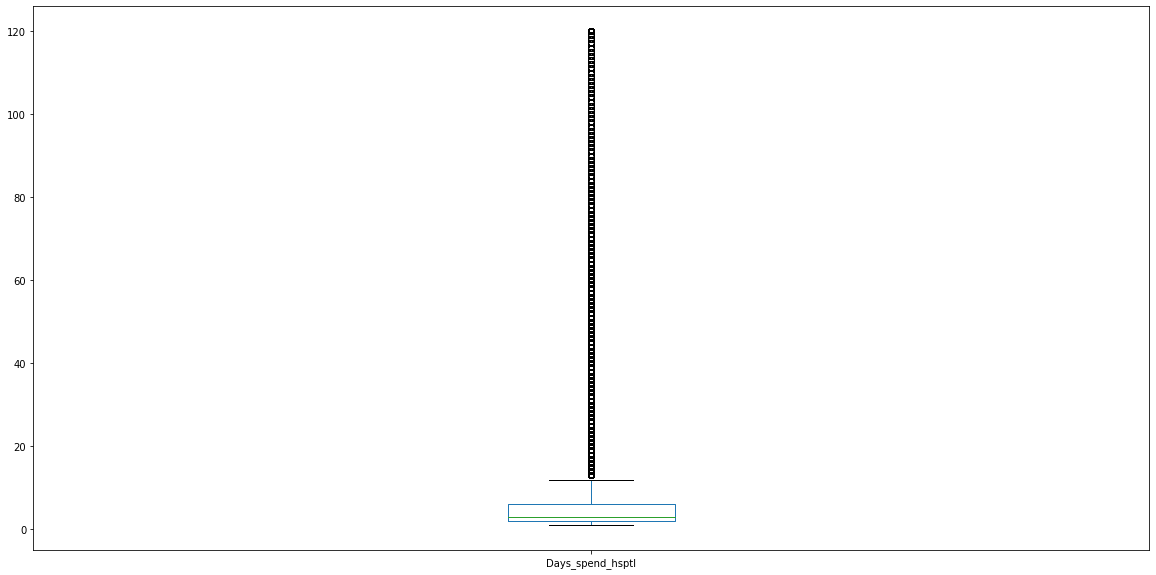

In [74]:
df5['Days_spend_hsptl'].plot(kind='box')

#### 1 - Minor
#### 2 - Moderate
#### 3 - Major
#### 4 - Extreme

In [75]:
df5.Code_illness.value_counts().sort_values(ascending=True)

4     73704
3    245590
1    337718
2    389065
Name: Code_illness, dtype: int64

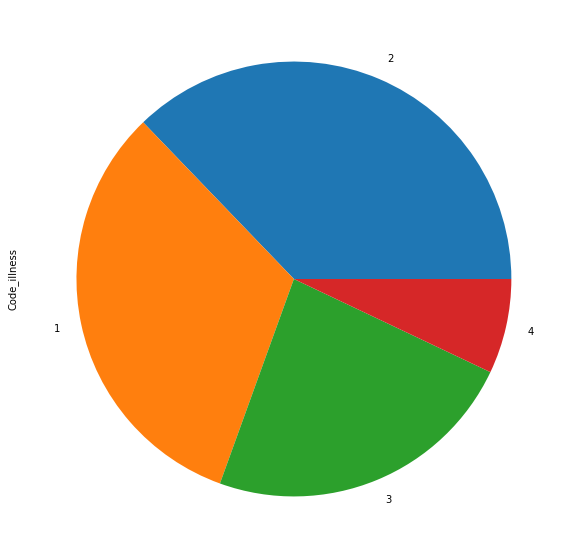

In [76]:
df5['Code_illness'].value_counts().plot(kind='pie')

#### 0 - Elective
#### 1 - Emergency
#### 2 - Newborn
#### 3 - Not Noted
#### 4 - Trauma
#### 5 - Urgent

In [77]:
df.Admission_type.value_counts()

Emergency        608595
Elective         235655
Urgent           110338
Newborn           90709
Trauma             2258
Not Available      1020
Name: Admission_type, dtype: int64

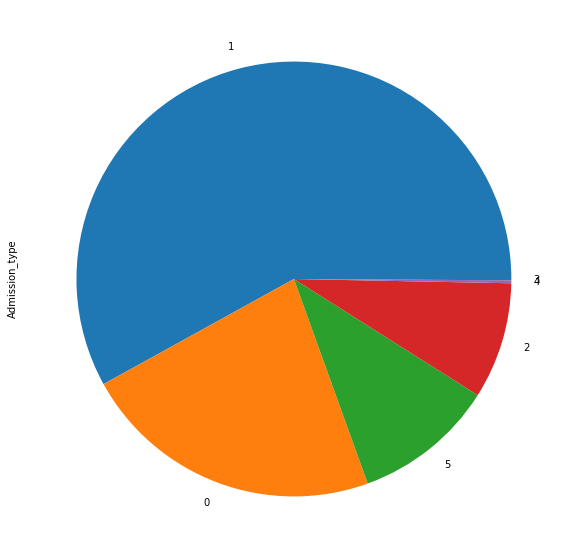

In [78]:
df5['Admission_type'].value_counts().plot(kind='pie')

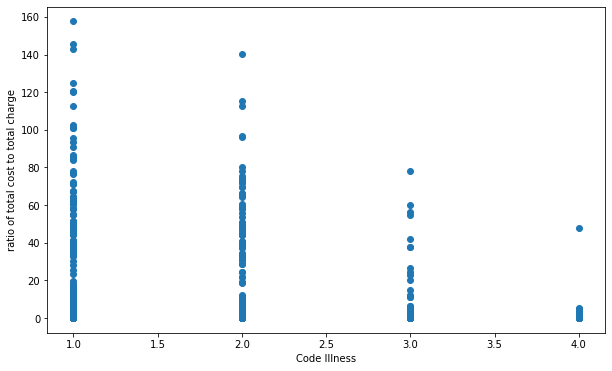

In [85]:
# Plotting a scatter plot
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(df5['Code_illness'], df5['ratio_of_total_costs_to_total_charges'])
ax.set_xlabel('Code Illness')
ax.set_ylabel('ratio of total cost to total charge')
plt.show()

### I conclude EDA